# ParaChangeFDS

## Idea

This notebook is an attempt to create an interface that allows for easy manipulation of parameters in Fire Dynamics Simulator FDS input files, executing the simulation and retrieving the results. As a general concept, there should be an FDS input file template, that describes the scenario in question.

Parameter values should be able to be defined within this notebook. A copy of the template should be created, as well as an appropriate sub-directory. The copy of the template is then written into the new directory, with the placeholders exchanged to parameter values. A process should be started that executes FDS automatically. After completion, the desired results are to be read into the notebook to be processes as desired.

Focus is set on simulations with a short calculation duration.

In [1]:
import os
import subprocess

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
%matplotlib inline

In [2]:
def exchange_placeholder(file, parameters):
    new_file_content = []
    with open(file, 'r') as f:
        for line in f:
            for parameter in parameters:
                ph = '#{}#'.format(parameter[0])
                if ph in line:
                    line = line.replace(ph, str(parameter[1]))
                    print(line)
        
            new_file_content.append(line)
    return new_file_content


def save_file(file_name, content, path, ending='fds'):
    if not os.path.isdir(path):
        os.makedirs(path)
        print("* New directory '{}' created.".format(path))

    else:
        print("* Directory '{}' already exists.".format(path))
    
    dir_list = next(os.walk(path))[1]
    counter = 0
    for directory in dir_list:
        counter += 1

    new_dir = os.path.join(path, file_name +'_'+ str(counter + 1))
    os.makedirs(new_dir)
    print("* New sub-directory '{}' created.".format(new_dir))
    
    np = os.path.join(new_dir, '{}_{}.{}'.format(file_name, counter+1, 
                                                 ending))

    with open(np, 'w') as f:
        for line in content:
            f.write(line) 
    
    return np


def run_job(file_path):
    cwd = os.getcwd()
    print(os.path.split(file_path))
    wd, fn = os.path.split(file_path)
    os.chdir(wd)
    subprocess.call("fds {}".format(fn), 
                    shell=True)  
    os.chdir(cwd)

In [3]:
print(os.getcwd())

D:\Git\Notebooks\ParaChangeFDS


In [4]:
# Define the example parameters.
parameters = [['chid', 'tga_analysis'],
              ['tend', 60.],
              ['ref_temp_comp_1', 315.],
              ['ref_temp_comp_2', '430.']]


# Define the location of the simulation inout template.
template = os.path.join('Example', 'template.fds')

In [5]:
a = exchange_placeholder(template, parameters)
nf = save_file(parameters[0][1], a, 'TestDir')
run_job(nf)

data_label = "_tga.csv"
data_file = "{}{}".format(nf[:-6], data_label)
data_sim = pd.read_csv(data_file, header=1)
data_sim.head()

&HEAD CHID=tga_analysis, TITLE='TGA tutorial' / 

&TIME T_END=60.0 /

      REFERENCE_TEMPERATURE = 315.0

      REFERENCE_TEMPERATURE = 430.

* New directory 'TestDir' created.
* New sub-directory 'TestDir\tga_analysis_1' created.
('TestDir\\tga_analysis_1', 'tga_analysis_1.fds')


,Time,Temp,Mass,MLR,MCC,DSC
0,12.0,21.000317,0.999627,0.000032,5.924180e-22,0.189221
1,24.0,22.000315,0.999239,0.000033,8.524605e-22,0.192155
2,36.0,23.000315,0.998837,0.000034,1.223638e-21,0.195164
3,48.0,24.000313,0.998419,0.000035,1.752165e-21,0.198248
4,60.0,25.000311,0.997985,0.000037,2.502944e-21,0.201406


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


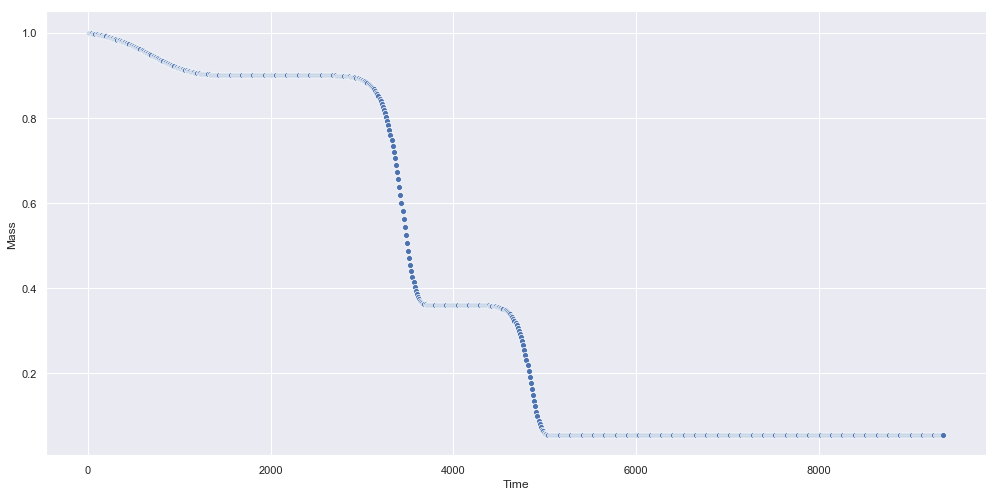

In [6]:
sns.pairplot(data_sim, x_vars=['Time'], y_vars=['Mass'], 
             size=7, aspect=2)
# sns.lineplot(data=data_sim, x='Time', y='Mass', kind="line", size=7, aspect=2)

# Cell Input Template

The above code was copied below. Copy it to new cells below, provide some input and enjoy the results.

In [ ]:
a = exchange_placeholder()
some_dir = 'SomeDir'

nf = save_file(parameters[0][1], a, some_dir)
run_job(nf)

data_label = "_tga.csv"
data_file = "{}{}".format(nf[:-6], data_label)
data_sim = pd.read_csv(data_file, header=1)
data_sim.head()


In [ ]:
sns.pairplot(data_sim, x_vars=['Time'], y_vars=['Mass'], 
             size=7, aspect=2)
# sns.lineplot(data=data_sim, x='Time', y='Mass', kind="line", size=7, aspect=2)

# Start Here with Your Own